In [74]:
import pandas as pd
import numpy as np
import colorama
import sys
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
colorama.init()

green = "\033[01;32m"
native = "\033[m"

""" CSV dosyası "," yerine ";" ile ayrıldığından ötürü sep=";" yaparak yeni ayırma biriminin ; olduğunu belirtiyoruz"""
red_df = pd.read_csv("C:/Users/ASUS PC/Desktop/UDACITY/Python Calismalar/Case Study 1 - Wine Rating/winequality-red.csv", sep=";")
red_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
white_df= pd.read_csv("C:/Users/ASUS PC/Desktop/UDACITY/Python Calismalar/Case Study 1 - Wine Rating/winequality-white.csv", sep=";")
white_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
"""data tiplerine kaç tane veri olduğuna / missing value vb buradan bakıyoruz"""
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [14]:
"""data tiplerine kaç tane veri olduğuna / missing value vb buradan bakıyoruz"""
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [15]:
""" kaç tane dublicated veri olduğunu gösterir --> ilk sütun için --> burada diğer sütunların dublicate verri bilgisine nasıl bakacağız?? """
sum(red_df.duplicated())

240

In [16]:
""" kaç tane dublicated veri olduğunu gösterir --> ilk sütun için --> burada diğer sütunların dublicate verri bilgisine nasıl bakacağız?? """
sum(white_df.duplicated())

937

In [17]:
"""kaç tane unique veri olduğuna buradan bakıyoruz"""
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [18]:
"""kaç tane unique veri olduğuna buradan bakıyoruz"""
white_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [20]:
"""red_df["density"].fillna(mean_red, inplace=True), print(red_df) --> bunu yapsaydık n/a verileri ortalama ile değiştirecektik, ayrıca aynı işlemi
   red_df["density"] = red_df["density"].fillna(mean) ataması ile de yapabilirdik"""
mean_red = red_df["density"].mean()
mean_red


0.996746679174484

In [23]:
"""red_df["density"].fillna(mean_red, inplace=True), print(red_df) --> bunu yapsaydık n/a verileri ortalama ile değiştirecektik, ayrıca aynı işlemi
   red_df["density"] = red_df["density"].fillna(mean) ataması ile de yapabilirdik"""
mean_white = white_df["density"].mean()
mean_white

0.9940273764801959

In [25]:
"""dataları birleştirmeye başlıyoruz
   ilk olarak red_wine datasına bir sütun ekleyerek red yazdıracağız"""
red_color = np.repeat("red", 1599)
red_df["color"] = red_color
red_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [26]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
color                   1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 156.2+ KB


In [27]:
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
color                     1
dtype: int64

In [28]:
white_color = np.repeat("white", 4898)
white_df["color"] = white_color
white_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [29]:
"""data birleştirme kısmı -- append ile --> red_df altına white_df ekledik."""
"""sütun isimleri aynı olmasaydı birleşmezdi , N/A'ler alabilirdik kontrol etmek lazım"""

wine_df = red_df.append(white_df, ignore_index=True)
wine_df.head(15)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [30]:
wine_df.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6482,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,6,white
6483,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5,white
6484,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,white
6485,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white
6486,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.00,7,white
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.20,5,white
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6,white
6489,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.80,6,white
6490,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.60,6,white
6491,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.70,5,white


In [31]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [32]:
"""groupby fonksiyonlarının kullanılması"""
"""groupby fonksiyonlarını kullanarak quality rating'e göre veri hesaplayacağız"""
"""as_index=True yaparak quality rating'i index olarak atadık"""
wine_df.groupby(("color"), as_index=True)["quality"].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [33]:
wine_df.groupby(("color"), as_index=True).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


In [35]:
"""%25'lik percentilelere göre ek bir sütun yapacağız"""
"""ilk olarak describe fonksiyonu ile değerleri buluyoruz-->pH için"""
wine_df["pH"].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [40]:
bin_edges = [2.720000, 3.110000, 3.210000, 3.320000, 4.010000]
bin_names = ["High", "Moderately High", "Medium", "Low"]
wine_df["acidity levels"] = pd.cut(wine_df["pH"], bin_edges, labels= bin_names)
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,Medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,Low
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,Low
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,Low


In [41]:
"""notlar (filtreleme ile ilgili)
    # selecting malignant records in cancer data
    df_m = df[df['diagnosis'] == 'M']
    df_m = df.query('diagnosis == "M"')

    # selecting records of people making over $50K
    df_a = df[df['income'] == ' >50K']
    df_a = df.query('income == " >50K"')"""

'notlar (filtreleme ile ilgili)\n    # selecting malignant records in cancer data\n    df_m = df[df[\'diagnosis\'] == \'M\']\n    df_m = df.query(\'diagnosis == "M"\')\n\n    # selecting records of people making over $50K\n    df_a = df[df[\'income\'] == \' >50K\']\n    df_a = df.query(\'income == " >50K"\')'

In [43]:
"""alkol oranı medyandan küçük ve büyük eşit olanların ayrı ayrı quality ratinglerini kıyaslayacağız"""
wine_df["alcohol"].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [48]:
median = wine_df["alcohol"].median()
median

10.3

In [57]:
wine_alcohol_lower_df = wine_df.query("alcohol < alcohol.median()")
wine_alcohol_lower_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177 entries, 0 to 6494
Data columns (total 14 columns):
fixed acidity           3177 non-null float64
volatile acidity        3177 non-null float64
citric acid             3177 non-null float64
residual sugar          3177 non-null float64
chlorides               3177 non-null float64
free sulfur dioxide     3177 non-null float64
total sulfur dioxide    3177 non-null float64
density                 3177 non-null float64
pH                      3177 non-null float64
sulphates               3177 non-null float64
alcohol                 3177 non-null float64
quality                 3177 non-null int64
color                   3177 non-null object
acidity levels          3176 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 338.3+ KB


In [56]:
wine_alcohol_higher_df = wine_df.query("alcohol >= alcohol.median()")
wine_alcohol_higher_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 9 to 6496
Data columns (total 14 columns):
fixed acidity           3320 non-null float64
volatile acidity        3320 non-null float64
citric acid             3320 non-null float64
residual sugar          3320 non-null float64
chlorides               3320 non-null float64
free sulfur dioxide     3320 non-null float64
total sulfur dioxide    3320 non-null float64
density                 3320 non-null float64
pH                      3320 non-null float64
sulphates               3320 non-null float64
alcohol                 3320 non-null float64
quality                 3320 non-null int64
color                   3320 non-null object
acidity levels          3320 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 353.5+ KB


In [63]:
wine_alcohol_higher_df.shape[0]

3320

In [64]:
wine_alcohol_lower_df.shape[0]

3177

In [65]:
"""doğru filtrelendi mi kontrol ettik"""
wine_alcohol_lower_df.shape[0] + wine_alcohol_higher_df.shape[0] == wine_df.shape[0]

True

In [66]:
wine_alcohol_lower_df["quality"].mean()

5.475920679886686

In [67]:
wine_alcohol_higher_df["quality"].mean()

6.146084337349397

In [70]:
"""grafik çizdirmeye geçiyoruz"""
"""red / white wine'ların quality rating'e olan etkisine bakacağız"""
quality_by_color = wine_df.groupby(("color"), as_index=True)["quality"].mean()
quality_by_color


color
red      5.636023
white    5.877909
Name: quality, dtype: float64

Text(0,0.5,'Quality')

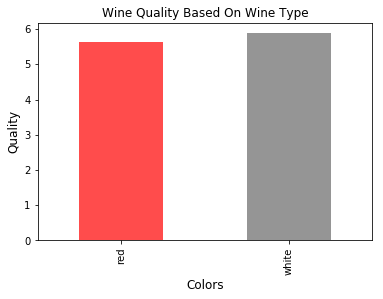

In [99]:
"""matplotlib kısmına ayrıca sonradan bakacağım şimdilik burada bırakıyorum"""
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
quality_by_color.plot(kind="bar", title="Wine Quality Based On Wine Type", color=["r", "dimgray"], alpha =.7)
plt.xlabel("Colors", fontsize = 12)
plt.ylabel("Quality", fontsize = 12)